# Step 1: Finding a suitable dataset
Correlation analysis and linear regression were two skills able to most grab my attention. Therefore, I chose to incorporate both topics to complete this project.

In the process of selecting a dataset, my aim was to find a subject matter that genuinely intrigued me. Consequently, I conducted an extensive search on kaggle.com, a reputable platform for datasets, with the intention of identifying a reliable NBA dataset encompassing comprehensive statistics from the top basketball players spanning several decades.

After careful consideration, I ultimately opted for the "mvp_votings.csv" dataset, which spans a time frame of 36 years and comprises a total of 637 player season stat lines.





In [ ]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Table.chart_colors=('blue', 'red')
plots.rcParams['figure.facecolor']='white'
plots.rcParams['axes.facecolor']='white'

In [ ]:
data = Table.read_table('mvp_votings.csv')

# Step 2: Data Cleaning and Problem Formulation
It is widely acknowledged that the most prominent NBA players exert a profound influence on the sport of basketball at all levels. Notable examples include Allen Iverson, who introduced a captivating style of dribbling, and Steve Nash, who popularized unconventional passes.

However, I am particularly intrigued by the impact of Stephen Curry's playing style. In order to delve into this topic more specifically, I would like to examine the relationship between the average number of three-pointers attempted per game and the overall field goal percentage. To accomplish this, I will compile data from the top players of each year since 1980, capturing their collective average field goal percentage alongside their collective average number of three-point attempts per game. These statistics will be organized into a comprehensive table.

Subsequently, I will construct a correlation matrix to ascertain the correlation coefficient, denoted as "r," which quantifies the relationship between the average number of three-point attempts per game and the average field goal percentage. By analyzing this correlation coefficient, I will be able to determine the slope and intercept values that establish the connection between the average field goal percentage and the average number of three-point attempts.

Armed with this valuable information, I will leverage my expertise in linear regression to predict the field goal percentage based on the number of three-point attempts per game. In this context, the number of three-point attempts will serve as the independent variable, while the field goal percentage will function as the dependent variable.


# Correlation Analysis

In [ ]:
table = Table().with_columns('Year', make_array(), 'fg_pct', make_array(), 'fg3a', make_array())
for i in range(36):
  year = str(i + 1980)
  next = str(int(year) + 1)
  next = next[2:]
  test = data.column('season')
  draft = data.where('season', np.str_('{}-{}'.format(year, next)))
  field_goal_pct = draft.column('fg_pct')
  field_goal_pct = np.mean(field_goal_pct)
  #DATA CLEANING
  field_goal_pct = np.delete(field_goal_pct, np.where(field_goal_pct == 0))
  threes_attempted = draft.column('fg3a')
  #DATA CLEANING
  threes_attempted = np.delete(threes_attempted, np.where(threes_attempted == 0))
  threes_attempted = np.mean(threes_attempted)
  table.append((next, field_goal_pct, threes_attempted))

In [ ]:
x = table.column('fg3a')
y = table.column('fg_pct')
r_matrix = np.corrcoef(x,y)
r = r_matrix[0,1]
r

-0.7514083404211036

In [ ]:
mean_cx = np.mean(x)
mean_cy = np.mean(y)
dev_x = []
dev_y = []
for i in x:
  dev_x.append(i - mean_cx)
for i in y:
  dev_y.append(i - mean_cy)
dev_x = np.array(dev_x)
dev_y = np.array(dev_y)

In [ ]:
std_x = np.std(dev_x)
std_y = np.std(dev_y)
inter = mean_cy - (r * (std_y/std_x) * mean_cx)
slope = r * (std_y/std_x)

# Linear Regression

In [ ]:
def linear_predict(value, slope, intercept):
  return slope * value + intercept

linear_predictions = Table().with_columns('Linear', make_array())
#x = np.sort(x)
for val in x:
  child_predicted = linear_predict(val,
                                   slope, # slope
                                   inter  # intercept
                                  )
  linear_predictions.append((child_predicted,))
line = linear_predictions.column('Linear')

In [ ]:
def linear_rmse(slope, intercept):
  y = table.column('fg_pct')
  x = table.column('fg3a')
  predictions = Table().with_columns('Area prediction', make_array())
  for i in x:
    prediction = slope * i + intercept
    predictions.append((prediction,))
  error = y - predictions.column('Area prediction')
  if np.mean(error) < 0:
    return -1 * np.sqrt(np.mean(error ** 2))
  return np.sqrt(np.mean(error ** 2))

In [ ]:
print(f'RMSE: {linear_rmse(slope, inter)}')

RMSE: -0.011828120972812637


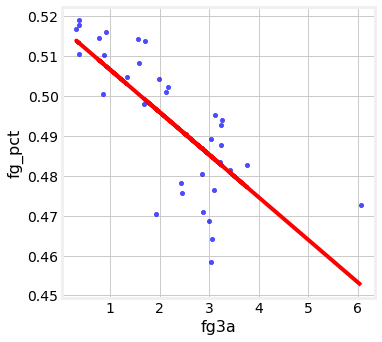

In [ ]:
table.scatter('fg3a', 'fg_pct')
plots.plot(x,line, 'r')

# Step 3: Analysis
This project was both highly intriguing and immensely fulfilling. My objective was to investigate the potential relationship between field goal percentage and the number of three-pointers attempted per game, employing the methodologies of correlation analysis and linear regression.

To my surprise, the results of the analysis revealed a lack of any significant correlation between field goal percentage and the quantity of three-point attempts. While I initially anticipated a negative correlation, given the negative slope observed, the absence of such a relationship was unexpected. Contrary to popular assumptions, the data does not support the notion that an increase in three-point attempts is directly associated with a decline in field goal percentage.

It is important to acknowledge the undeniable impact of Stephen Curry on the game of basketball. However, it would be erroneous to solely attribute lower field goal percentages to his influence. Although his playing style has often been associated with an increase in low-percentage shots, this study refutes the theory that Stephen Curry is solely responsible for any perceived decline in field goal percentages.

In summary, this project provided a valuable and captivating exploration of the intricate dynamics between field goal percentage and three-point attempts. The findings challenge conventional wisdom and offer valuable insights into the multifaceted nature of basketball.